In [1]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_loan=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df_loan.shape

(614, 13)

The data reflects that it contains the categorical, majority is of binary data as well as numerical data having 614 rows andd 13 columns.

In [4]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


7 columns have null values

8 columns are in object type

In [5]:
# Let's use the describe function to check the statistical summary of the dataset.

df_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


OBSERVATIONS :

1. The range of ApplicantIncome and CoapplicantIncome is high as compared to other variables. The range CoapplicantIncome and LoanAmount is moderate.
2. With this, it is reflecting that th eoutliers are also present.
3. The median of Loan_Amount_Term and Credit_History is more than their mean.
4. The data is somewhat skewd.

In [6]:
# Let's check the null values.

df_loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

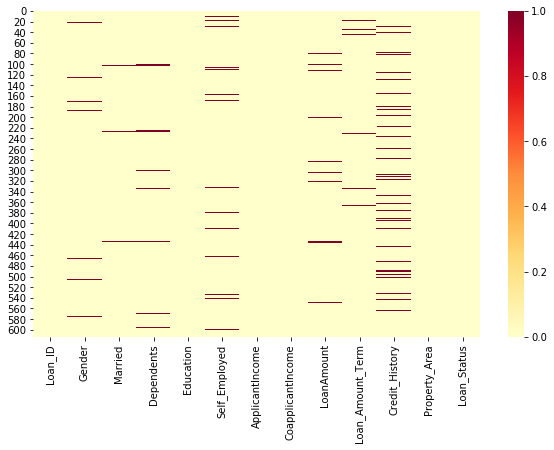

In [7]:
# Visualizing the null values using heatmap.

plt.figure(figsize=(10,6))
sns.heatmap(df_loan.isnull(), cmap = 'YlOrRd')
plt.show()

There are null values present in Gender, Departments, Self Employed, Loan Amount and Credit history which needs to be filled.

#### Checking unique values in object columns

In [8]:
df_loan.select_dtypes(object).nunique()

Loan_ID          614
Gender             2
Married            2
Dependents         4
Education          2
Self_Employed      2
Property_Area      3
Loan_Status        2
dtype: int64

 We can drop Loan_ID since its unique id 

In [9]:
df_loan.drop(columns=['Loan_ID'],inplace=True)

#### Handling Null values

In [10]:
# Handing columns having numerical data with median

df_loan.LoanAmount.fillna(df_loan.LoanAmount.median(),inplace=True)
df_loan.Loan_Amount_Term.fillna(df_loan.Loan_Amount_Term.median(),inplace=True)
df_loan.Credit_History.fillna(df_loan.Credit_History.median(),inplace=True)

In [11]:
# Let's check the mode of the categorical data and data having binary nature.

gen_mode = df_loan['Gender'].mode()
print("Mode of Gender :", gen_mode, '\n')

dep_mode = df_loan['Dependents'].mode()
print("Mode of Dependents :", dep_mode, '\n')

slf_mode = df_loan['Self_Employed'].mode()
print("Mode of Self Employed :", slf_mode, '\n')

mr_mode = df_loan['Married'].mode()
print("Mode of Married :", mr_mode, '\n')

Mode of Gender : 0    Male
dtype: object 

Mode of Dependents : 0    0
dtype: object 

Mode of Self Employed : 0    No
dtype: object 

Mode of Married : 0    Yes
dtype: object 



In [12]:
# Replacing the null values with the mode of the rest columns having null values.

df_loan.Gender = df_loan.Gender.fillna('Male')
df_loan.Dependents = df_loan.Dependents.fillna('0')
df_loan.Self_Employed = df_loan.Self_Employed.fillna('No')
df_loan.Married  = df_loan.Married .fillna('Yes')

In [13]:
df_loan.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Handling Object columns

In [14]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [15]:
for col in df_loan.select_dtypes(object).columns:
    df_loan[col]=lb.fit_transform(df_loan[col])

In [16]:
df_loan.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

Handled all the object columns 

In [18]:
df_loan.shape

(614, 12)

#### Handling Outliers and Skewness

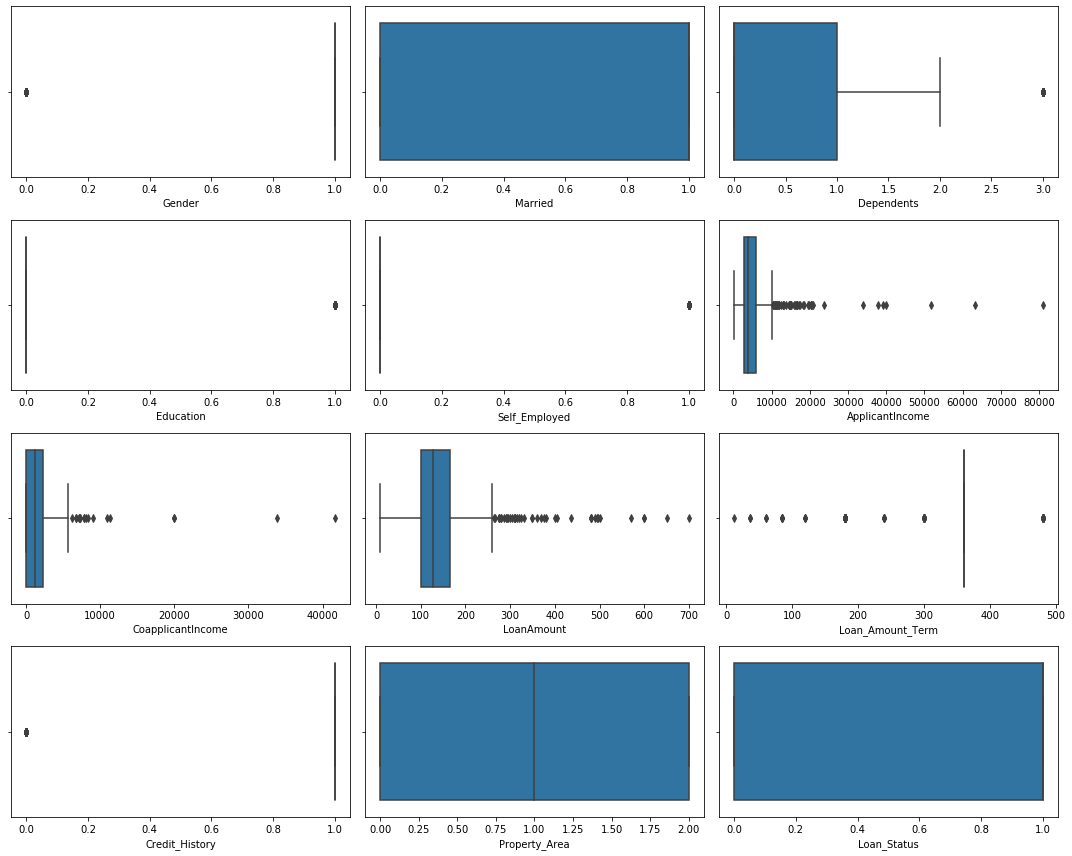

In [19]:
plt.figure(figsize=(15,12))

for x,col in enumerate(df_loan.columns):
    
    plt.subplot(4,3,x+1)
    sns.boxplot(df_loan[col])
    plt.tight_layout()

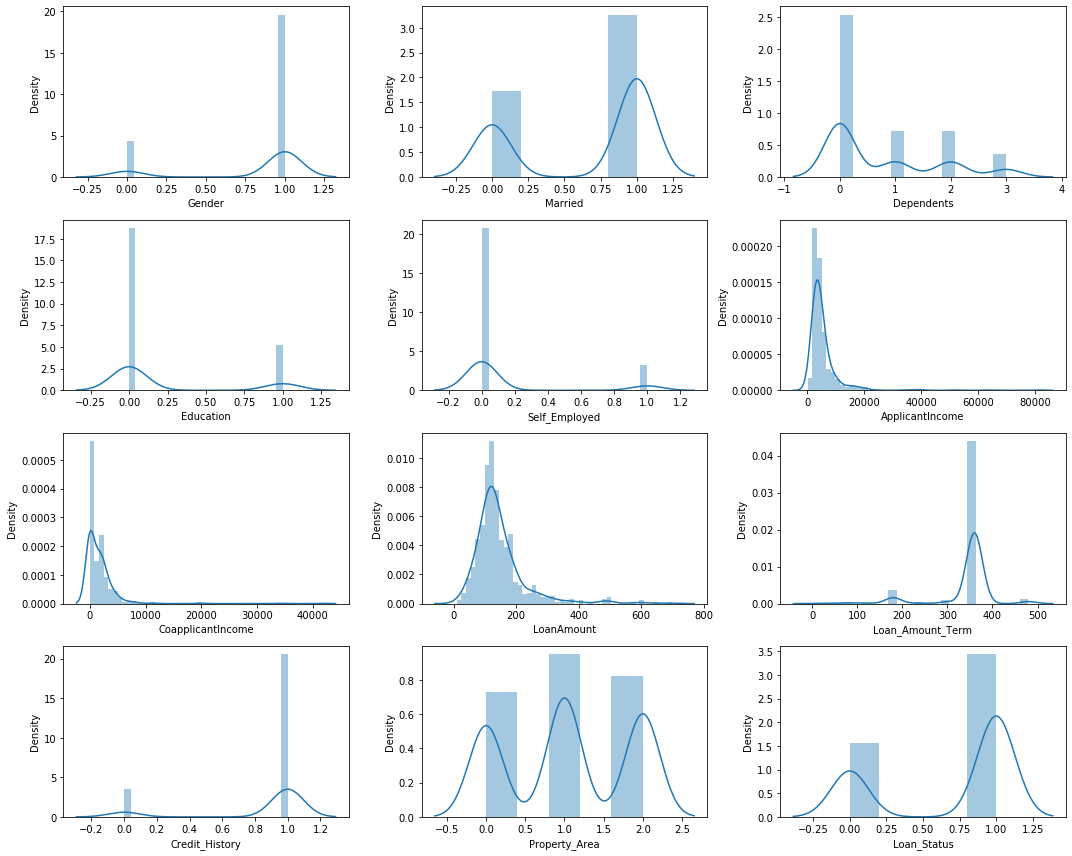

In [20]:
plt.figure(figsize=(15,12))

for x,col in enumerate(df_loan.columns):
    
    plt.subplot(4,3,x+1)
    sns.distplot(df_loan[col])
    plt.tight_layout()

In [21]:
# Let's check the skewness of the data before removing the outliers.

df_loan.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [25]:
# Let's now check the outliers and clean the data.

from scipy.stats import zscore

z = np.abs(zscore(df_loan))
print(df_loan.shape)

# Removing the outliers.

df_loan= df_loan.loc[(z<3).all(axis=1)]
print(df_loan.shape)

(614, 12)
(577, 12)


37 rows has been removed to handle outliers

#### Splitting Data into input and output

In [26]:
xdata=df_loan.drop(columns=['Loan_Status'])
xdata.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2


Scaling xdata

In [27]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [28]:
xdata=pd.DataFrame(std.fit_transform(xdata),columns=xdata.columns)
xdata.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.399266,-0.861036,-0.130895,0.230853,0.418513,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,-0.028020,0.052840,-0.130895,0.230853,0.418513,-1.306522
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.562297,-0.861036,-1.235554,0.230853,0.418513,1.227472
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.703039,0.567956,-0.273432,0.230853,0.418513,1.227472
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.450230,-0.861036,0.100727,0.230853,0.418513,1.227472


In [29]:
ydata=df_loan[['Loan_Status']]
ydata.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


In [30]:
print(xdata.shape)
print(ydata.shape)

(577, 11)
(577, 1)


In [31]:
# Importing the neccesary sklearn libraries.

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_curve,auc, confusion_matrix

In [33]:
# Splitting the training and testing data and finding the maximum accuracy score at best random state.

def m (clf ,X, y):
    max_acc_scr = 0
    for r_state in range(42,101):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = r_state)
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        acc_scr = accuracy_score(pred, y_test)
        if acc_scr > max_acc_scr:
            max_acc_scr = acc_scr
            final_r_state = r_state
    
    print("Maximum Accuracy score is :", max_acc_scr, "achieved at :", final_r_state)
    print("\n")
    print("Classification Report :\n", classification_report(pred, y_test))
    print("\n")
    print("Confusion Matrix :\n", confusion_matrix(pred, y_test))
    print("\n")       
    false_positive_rate, true_positive_rate, threshold = roc_curve(pred, y_test)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print("ROC_AUC_CURVE :", roc_auc)
    print("\n")
    print(sns.heatmap(confusion_matrix(pred, y_test), annot=True))
    print('\n')

-------Logistic Regression-------
Maximum Accuracy score is : 0.896551724137931 achieved at : 91


Classification Report :
               precision    recall  f1-score   support

           0       0.54      0.91      0.68        22
           1       0.97      0.82      0.89        94

    accuracy                           0.84       116
   macro avg       0.76      0.86      0.78       116
weighted avg       0.89      0.84      0.85       116



Confusion Matrix :
 [[20  2]
 [17 77]]


ROC_AUC_CURVE : 0.8641199226305609


AxesSubplot(0.125,0.125;0.62x0.755)


Cross validation score : 0.8163418290854573
Standard Deviationscore : 0.025614638905249527




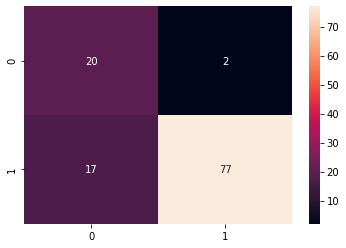

In [36]:
# Let's check the accuracy score and other scores of Logistic Regression.

print("-------Logistic Regression-------")
lr = LogisticRegression()
r_state = m(lr, xdata, ydata)
print("Cross validation score :", cross_val_score(lr, xdata, ydata, cv=5, scoring = "accuracy").mean())
print("Standard Deviationscore :", cross_val_score(lr, xdata, ydata, cv=5, scoring = "accuracy").std())
print("\n")

-------GaussianNB-------
Maximum Accuracy score is : 0.896551724137931 achieved at : 91


Classification Report :
               precision    recall  f1-score   support

           0       0.54      0.91      0.68        22
           1       0.97      0.82      0.89        94

    accuracy                           0.84       116
   macro avg       0.76      0.86      0.78       116
weighted avg       0.89      0.84      0.85       116



Confusion Matrix :
 [[20  2]
 [17 77]]


ROC_AUC_CURVE : 0.8641199226305609


AxesSubplot(0.125,0.125;0.62x0.755)


Cross validation score : 0.8059070464767617
Standard Deviationscore : 0.012742605126938622




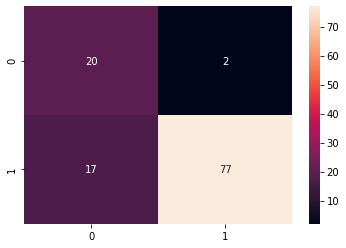

In [37]:
# Let's check the accuracy score and other scores of GaussianNB.

print("-------GaussianNB-------")
gnb = GaussianNB()
r_state = m(gnb, xdata, ydata)
print("Cross validation score :", cross_val_score(gnb, xdata, ydata, cv=5, scoring = "accuracy").mean())
print("Standard Deviationscore :", cross_val_score(gnb, xdata, ydata, cv=5, scoring = "accuracy").std())
print("\n")

-------DecisionTreeClassifier-------
Maximum Accuracy score is : 0.7758620689655172 achieved at : 50


Classification Report :
               precision    recall  f1-score   support

           0       0.62      0.62      0.62        37
           1       0.82      0.82      0.82        79

    accuracy                           0.76       116
   macro avg       0.72      0.72      0.72       116
weighted avg       0.76      0.76      0.76       116



Confusion Matrix :
 [[23 14]
 [14 65]]


ROC_AUC_CURVE : 0.722203215874102


AxesSubplot(0.125,0.125;0.62x0.755)


Cross validation score : 0.7279910044977511
Standard Deviationscore : 0.0282614064269632




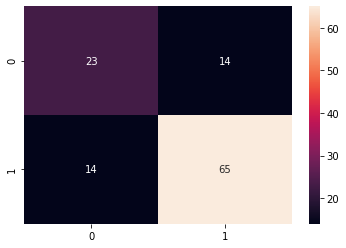

In [38]:
# Let's check the accuracy score and other scores of DecisionTreeClassifier.

print("-------DecisionTreeClassifier-------")
dtc = DecisionTreeClassifier()
r_state = m(dtc, xdata, ydata)
print("Cross validation score :", cross_val_score(dtc, xdata, ydata, cv=5, scoring = "accuracy").mean())
print("Standard Deviationscore :", cross_val_score(dtc, xdata, ydata, cv=5, scoring = "accuracy").std())
print("\n")

-------SVC-------
Maximum Accuracy score is : 0.8793103448275862 achieved at : 84


Classification Report :
               precision    recall  f1-score   support

           0       0.54      0.91      0.68        22
           1       0.97      0.82      0.89        94

    accuracy                           0.84       116
   macro avg       0.76      0.86      0.78       116
weighted avg       0.89      0.84      0.85       116



Confusion Matrix :
 [[20  2]
 [17 77]]


ROC_AUC_CURVE : 0.8641199226305609


AxesSubplot(0.125,0.125;0.62x0.755)


Cross validation score : 0.81287856071964
Standard Deviationscore : 0.027396781357038397




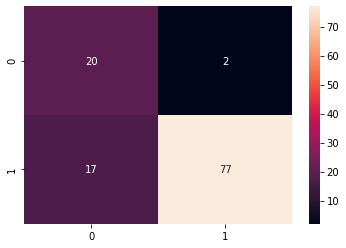

In [40]:
# Let's check the accuracy score and other scores of SVC.

print("-------SVC-------")
sv = SVC()
r_state = m(sv, xdata, ydata)
print("Cross validation score :", cross_val_score(sv, xdata, ydata, cv=5, scoring = "accuracy").mean())
print("Standard Deviationscore :", cross_val_score(sv, xdata, ydata, cv=5, scoring = "accuracy").std())
print("\n")

-------KNeighborsClassifier-------
Maximum Accuracy score is : 0.853448275862069 achieved at : 91


Classification Report :
               precision    recall  f1-score   support

           0       0.49      0.78      0.60        23
           1       0.94      0.80      0.86        93

    accuracy                           0.79       116
   macro avg       0.71      0.79      0.73       116
weighted avg       0.85      0.79      0.81       116



Confusion Matrix :
 [[18  5]
 [19 74]]


ROC_AUC_CURVE : 0.7891538101916784


AxesSubplot(0.125,0.125;0.62x0.755)


Cross validation score : 0.7920839580209895
Standard Deviationscore : 0.0258736736018023




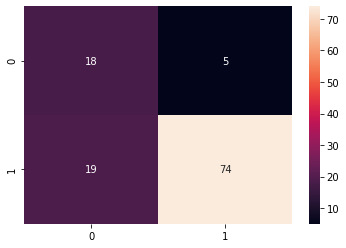

In [42]:
# Let's check the accuracy score and other scores of KNeighborsClassifier.

print("-------KNeighborsClassifier-------")
knnc = KNeighborsClassifier()
r_state = m(knnc, xdata, ydata)
print("Cross validation score :", cross_val_score(knnc, xdata, ydata, cv=5, scoring = "accuracy").mean())
print("Standard Deviationscore :", cross_val_score(knnc, xdata, ydata, cv=5, scoring = "accuracy").std())
print("\n")

-------RandomForestClassifier-------
Maximum Accuracy score is : 0.8706896551724138 achieved at : 95


Classification Report :
               precision    recall  f1-score   support

           0       0.59      0.85      0.70        26
           1       0.95      0.83      0.89        90

    accuracy                           0.84       116
   macro avg       0.77      0.84      0.79       116
weighted avg       0.87      0.84      0.85       116



Confusion Matrix :
 [[22  4]
 [15 75]]


ROC_AUC_CURVE : 0.8397435897435898


AxesSubplot(0.125,0.125;0.62x0.755)


Cross validation score : 0.7937781109445277
Standard Deviationscore : 0.016108955170609392




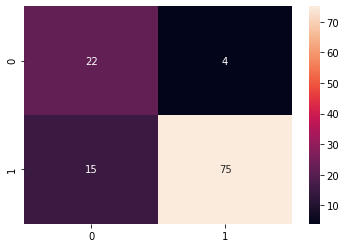

In [44]:
# Let's check the accuracy score and other scores of different algorithms.

print("-------RandomForestClassifier-------")
rfc = RandomForestClassifier()
r_state = m(rfc, xdata, ydata)
print("Cross validation score :", cross_val_score(rfc, xdata, ydata, cv=5, scoring = "accuracy").mean())
print("Standard Deviationscore :", cross_val_score(rfc, xdata, ydata, cv=5, scoring = "accuracy").std())
print("\n")

-------ExtraTreesClassifier-------
Maximum Accuracy score is : 0.8362068965517241 achieved at : 86


Classification Report :
               precision    recall  f1-score   support

           0       0.62      0.77      0.69        30
           1       0.91      0.84      0.87        86

    accuracy                           0.82       116
   macro avg       0.77      0.80      0.78       116
weighted avg       0.84      0.82      0.82       116



Confusion Matrix :
 [[23  7]
 [14 72]]


ROC_AUC_CURVE : 0.8019379844961241


AxesSubplot(0.125,0.125;0.62x0.755)


Cross validation score : 0.7729685157421289
Standard Deviationscore : 0.0062462448456200356




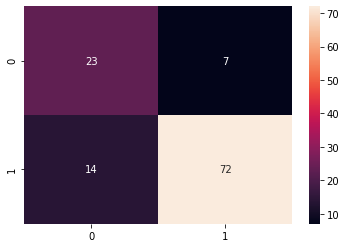

In [45]:
# Let's check the accuracy score and other scores of different algorithms.

print("-------ExtraTreesClassifier-------")
etc = ExtraTreesClassifier()
r_state = m(etc, xdata, ydata)
print("Cross validation score :", cross_val_score(etc, xdata, ydata, cv=5, scoring = "accuracy").mean())
print("Standard Deviationscore :", cross_val_score(etc, xdata, ydata, cv=5, scoring = "accuracy").std())
print("\n")